## 各位同学好，这次作业我们来实践利用python的数据可视化

今天咱们要用到的数据还是NYSE的数据，没有数据的同学可以找班主任要哈，他那边有百度网盘~

这里展示的图片大家需要满足以下要求，每一个组图片按照以下要求给分：
1. 内容正确40%
2. 图标题、坐标轴标题清晰明了20%
3. 颜色选取清晰20% 
    > 注：对于有着不同意义的数据点要用**不同类型的点**做图例标注，避免歧义 `ax.set_prop_circle`, `sns.hls_palette`
4. 图片中信息分布合理20% 
    > 注：对于过分集中的数据采用对数坐标 `plt.gca().set_xscale`

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

## 图1：用饼图表示NYSE数据中2015年净利润（Net Income）最多的100家公司的行业（GICS Sector）组成（30 分）

In [121]:
file1 = r'./fundamentals.csv'
file2 = r'./securities.csv'
fund = pd.read_csv(file1)
sec = pd.read_csv(file2)
sec['Date first added'] = pd.to_datetime(sec['Date first added'], format = '%Y-%m-%d')


In [122]:
data = pd.merge(fund, sec, left_on = 'Ticker Symbol', right_on = 'Ticker symbol')
data1 = data[data['For Year'] == 2015.0]
data_sorted = data.sort_values('Net Income', ascending = False)[:100]["GICS Sector"]  # 最后的['GICS Sector']相当于取出这一列

In [123]:
# 计算每个sector的数量
from collections import Counter
sector_counter = Counter(data_sorted.tolist())

sector_counter = dict(sorted(sector_counter.items(), key = lambda x : x[1]))
print(sector_counter)

{'Industrials': 5, 'Energy': 7, 'Telecommunications Services': 7, 'Consumer Discretionary': 10, 'Health Care': 11, 'Consumer Staples': 16, 'Financials': 17, 'Information Technology': 27}


In [124]:
sector = []
count = []
for sec, num in sector_counter.items():
    sector.append(sec)
    count.append(num)

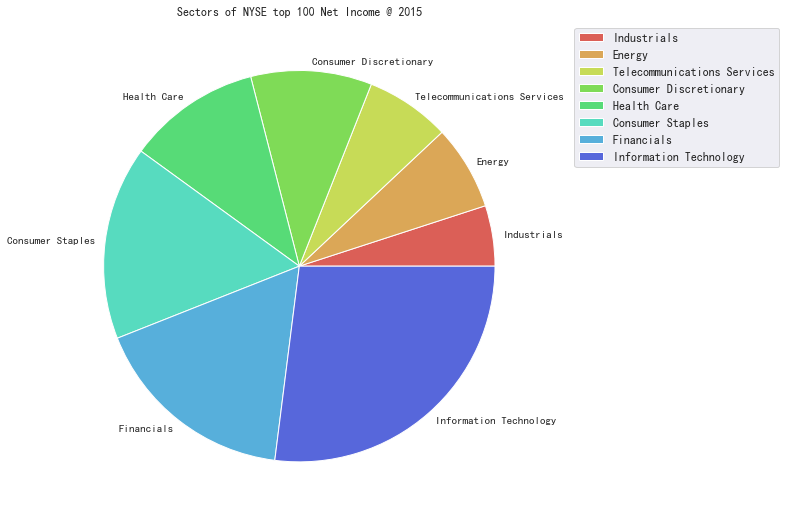

In [125]:
_, ax = plt.subplots(figsize = (16, 9))

ax.set_prop_cycle(color = sns.hls_palette(11))

plt.pie(count, labels = sector, labeldistance = 1.05)

plt.title("Sectors of NYSE top 100 Net Income @ 2015")
plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, fontsize = 12)
plt.show()

## 图2：在一张直方图中表示不同行业（GICS Sector）的营收（total revenue）分布（30 分）

In [63]:
data2 = data[['GICS Sector', 'Total Revenue', 'For Year']]
data2 = data2[data2['For Year'] == 2015.0]
data2.drop('For Year', axis = 1, inplace = True)

sector_name = data2['GICS Sector'].unique()

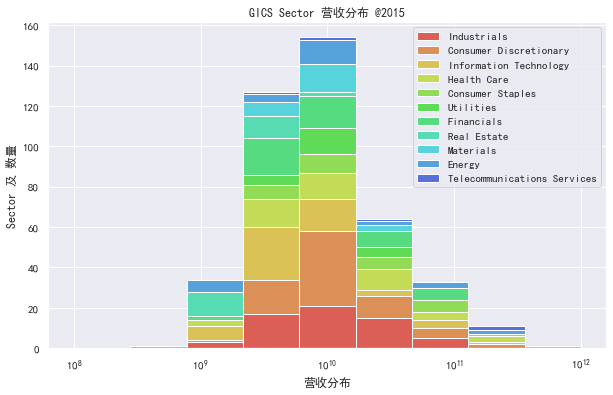

In [126]:
plt.rcParams['font.sans-serif'] = ['SimHei']

_, ax2 = plt.subplots(figsize = (10, 6))

plt.gca().set_xscale('log')
ax2.set_prop_cycle(color = sns.hls_palette(16))

plt.hist(
    x = [ data2[data2['GICS Sector'] == name]['Total Revenue'] for name in sector_name],
    bins = np.logspace(np.log10(1e8), np.log10(1e12), 10),
    label = sector_name,
    density = False,
    stacked = True
)

plt.xlabel('营收分布')
plt.ylabel('Sector 及 数量')
plt.title('GICS Sector 营收分布 @2015')
plt.plot()
plt.legend()
plt.show()

## 图3：在一张二维散点图中表示不同行业的固定资产（Fixed Assets）/总资产（Total Assets）与盈利（Net Income）和营收(Total Revenue)的比例 （40 分）

In [127]:
data['F/T'] = data['Fixed Assets'] / data['Total Assets']
data['I/R'] = data['Net Income'] / data['Total Revenue']

data3 = data[['F/T', 'I/R', 'For Year', 'GICS Sector']]
data3 = data3[data3['For Year'] == 2015.0]
data3.drop('For Year', inplace = True, axis = 1)

sector_name = data3['GICS Sector'].unique()

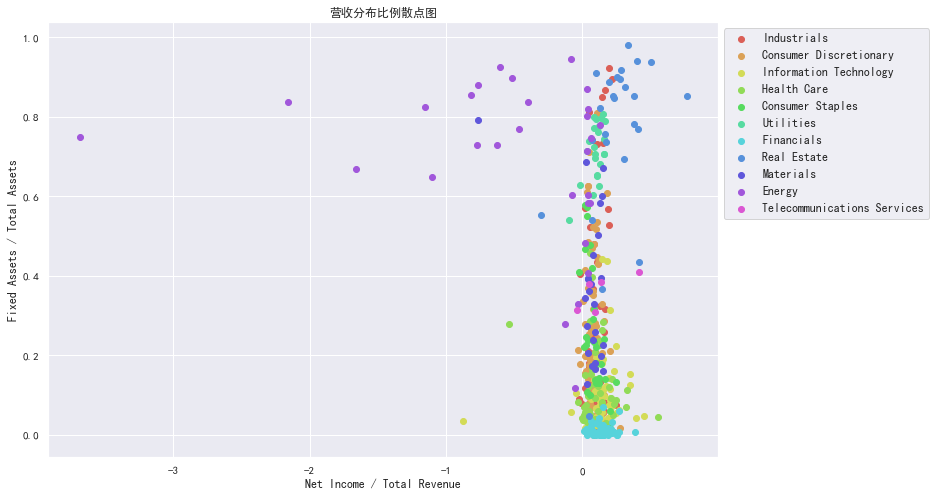

In [128]:
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False

_, ax3 = plt.subplots(figsize = (12, 8))

ax3.set_prop_cycle(color = sns.hls_palette(12))

# marker = ['.', 'x', '*', '+', 'o', 'v', '^', '1', '2', '3', '4']
for i, sn in enumerate(sector_name):
    plt.scatter(
        x = data3[data3['GICS Sector'] == sn]['I/R'],
        y = data3[data3['GICS Sector'] == sn]['F/T'],
#         marker = marker[i]
    )

plt.title("营收分布比例散点图")
plt.legend(sector_name, bbox_to_anchor = (1, 1), loc = 2, fontsize = 12)
plt.xlabel("Net Income / Total Revenue")
plt.ylabel("Fixed Assets / Total Assets")
plt.plot()
plt.show()